In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

train = pd.read_csv('./data/train.csv', index_col='no')
test = pd.read_csv('./data/test.csv', index_col='no')

def strip_title(row):
    return row.strip()

# train 공백제거
# except pass 는 수치형나오면 오류나는거를 pass한것
for i in range(len(train.columns)):
    try:
        train.iloc[:,i] = train.iloc[:,i].apply(strip_title)
    except:
        pass
# test 공백제거
for i in range(len(test.columns)):
    try:
        test.iloc[:,i] = test.iloc[:,i].apply(strip_title)
    except:
        pass
    

In [4]:
# ?을 other로 변환
train['occupation'] = train['occupation'].replace('?','other')
train['workclass'] = train['workclass'].replace('?','other')
train['native-country'] = train['native-country'].replace('?','other')

# ?을 other로 변환
test['occupation'] = test['occupation'].replace('?','other')
test['workclass'] = test['workclass'].replace('?','other')
test['native-country'] = test['native-country'].replace('?','other')

In [12]:
train = train.drop('fnlwgt' , axis = 1)
test = test.drop('fnlwgt', axis =1)
train.drop("education", axis = 1, inplace = True)
test.drop("education", axis = 1, inplace = True)


<AxesSubplot:xlabel='education-num', ylabel='count'>

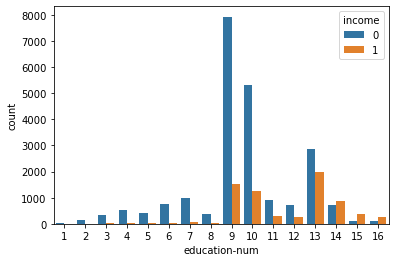

In [21]:
ax = sns.countplot(data = train, x='education-num', hue='income')
ax

In [23]:
train.corr()

,age,education-num,capital-gain,capital-loss,hours-per-week,income
age,1.000000,0.035084,0.078498,0.054413,0.073100,0.238460
education-num,0.035084,1.000000,0.127651,0.083925,0.147569,0.331798
capital-gain,0.078498,0.127651,1.000000,-0.031401,0.088609,0.221387
capital-loss,0.054413,0.083925,-0.031401,1.000000,0.055271,0.135645
hours-per-week,0.073100,0.147569,0.088609,0.055271,1.000000,0.231045
income,0.238460,0.331798,0.221387,0.135645,0.231045,1.000000


In [24]:
train['native-country'].value_counts()

United-States                 26301
Mexico                          579
other                           495
Philippines                     178
Germany                         124
Puerto-Rico                     117
Canada                          111
El-Salvador                      96
Cuba                             94
India                            90
England                          75
South                            74
Jamaica                          68
China                            68
Dominican-Republic               61
Italy                            60
Japan                            54
Poland                           53
Columbia                         53
Guatemala                        51
Haiti                            51
Vietnam                          50
Portugal                         43
Taiwan                           39
Iran                             38
Nicaragua                        28
Peru                             25
Greece                      

In [25]:
train.corr()

,age,education-num,capital-gain,capital-loss,hours-per-week,income
age,1.000000,0.035084,0.078498,0.054413,0.073100,0.238460
education-num,0.035084,1.000000,0.127651,0.083925,0.147569,0.331798
capital-gain,0.078498,0.127651,1.000000,-0.031401,0.088609,0.221387
capital-loss,0.054413,0.083925,-0.031401,1.000000,0.055271,0.135645
hours-per-week,0.073100,0.147569,0.088609,0.055271,1.000000,0.231045
income,0.238460,0.331798,0.221387,0.135645,0.231045,1.000000


In [27]:
train.groupby(["capital-gain", "income"]).mean()

age  education-num  capital-loss  hours-per-week
capital-gain income                                                        
0            0       36.610142       9.599259     58.951168       38.811380
             1       44.181132      11.521473    232.699012       45.370710
114          0       32.200000       8.200000      0.000000       44.000000
401          0       74.500000       8.750000      0.000000       14.000000
594          0       24.514286       9.200000      0.000000       25.371429
...                        ...            ...           ...             ...
25236        1       46.100000      13.900000      0.000000       42.900000
27828        1       44.358974      13.076923      0.000000       47.897436
34095        0       18.333333       8.333333      0.000000       15.000000
41310        0       42.000000       8.000000      0.000000       54.666667
99999        1       47.033784      13.168919      0.000000       51.648649

[120 rows x 4 columns]

In [36]:
train.groupby(["capital-gain", "income"]).mean()

age  education-num  capital-loss  hours-per-week
capital-gain income                                                        
0            0       36.610142       9.599259     58.951168       38.811380
             1       44.181132      11.521473    232.699012       45.370710
114          0       32.200000       8.200000      0.000000       44.000000
401          0       74.500000       8.750000      0.000000       14.000000
594          0       24.514286       9.200000      0.000000       25.371429
...                        ...            ...           ...             ...
25236        1       46.100000      13.900000      0.000000       42.900000
27828        1       44.358974      13.076923      0.000000       47.897436
34095        0       18.333333       8.333333      0.000000       15.000000
41310        0       42.000000       8.000000      0.000000       54.666667
99999        1       47.033784      13.168919      0.000000       51.648649

[120 rows x 4 columns]

In [37]:
train['capital-gain'].value_counts()

0        26883
15024      300
7688       240
7298       204
99999      148
         ...  
7978         1
1264         1
6097         1
6612         1
18481        1
Name: capital-gain, Length: 117, dtype: int64